# Linear Regression from Scratch

In this notebook, we will implement linear regression using custom Python code. We will cover the following steps:

- Generating synthetic data
- Visualizing the data
- Implementing the linear regression algorithm
- Training the model
- Evaluating the results

Let's get started!

In [1]:
#import the module
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#generate random data
torch.manual_seed(0)
#random uniform distribution fallowing the monte carlo method
x_rand = torch.rand(100) * 6 - 3
x_rand = x_rand.unsqueeze(1)
y_rand = 2*x_rand + torch.randn(x_rand.shape)*0.9
print(x_rand.shape, y_rand.shape)

torch.Size([100, 1]) torch.Size([100, 1])


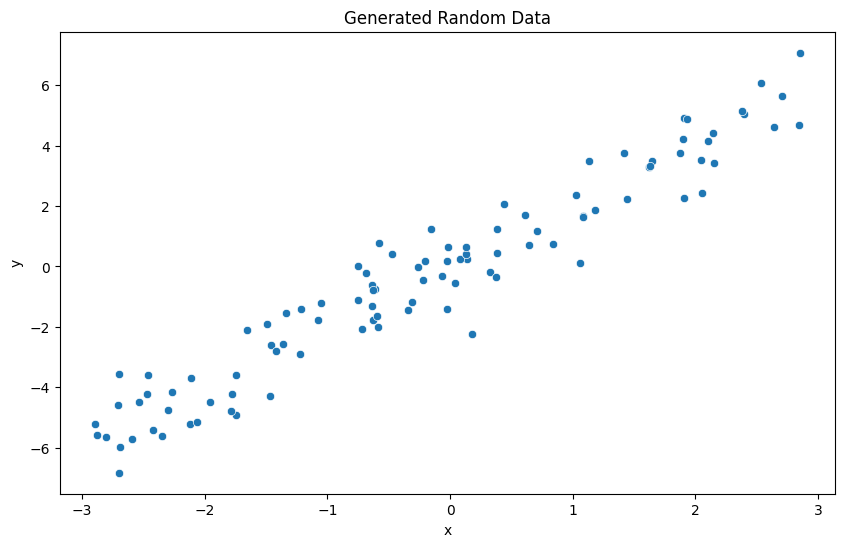

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_rand.squeeze().numpy(), y=y_rand.squeeze().numpy())
plt.title('Generated Random Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Basic math
y_pred = m*x_rand + c
so we need m and c to generate, first let's calculate randomly and backpropagation willl handle it
mean squared error
((y_pred - y_rand)**2).mean()



Initial loss: 5.385831832885742
Gradient of m: -6.892538070678711
Gradient of c: 1.3290927410125732
Epoch 0, Loss: 5.385831832885742, m: 0.8469821810722351, c: 0.38063955307006836
Epoch 10, Loss: 2.149199962615967, m: 1.3315211534500122, c: 0.27853330969810486
Epoch 20, Loss: 1.2397127151489258, m: 1.6088887453079224, c: 0.20940016210079193
Epoch 30, Loss: 0.9345983266830444, m: 1.767346978187561, c: 0.16109000146389008
Epoch 40, Loss: 0.8307631015777588, m: 1.857612133026123, c: 0.12628309428691864
Epoch 50, Loss: 0.794445276260376, m: 1.9088153839111328, c: 0.10049691796302795
Epoch 60, Loss: 0.7810994982719421, m: 1.9376815557479858, c: 0.08092940598726273
Epoch 70, Loss: 0.7757852673530579, m: 1.9538061618804932, c: 0.06578487157821655
Epoch 80, Loss: 0.7734201550483704, m: 1.9626883268356323, c: 0.05387939140200615
Epoch 90, Loss: 0.7722282409667969, m: 1.967475414276123, c: 0.04440779238939285


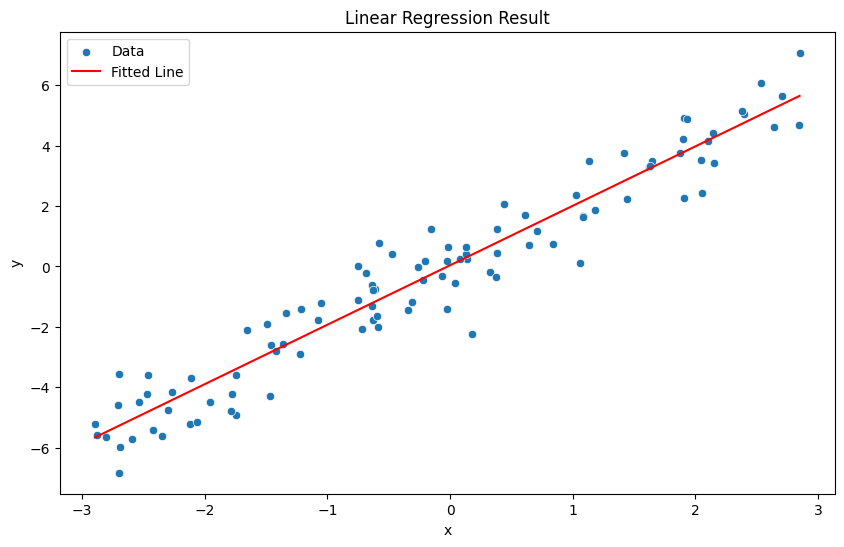

In [19]:
#implementing linear regression
#lets assign initial values for m and c
#we will use backpropagation to find the best values
#we will use torch's autograd to calculate gradients
m = torch.randn(1, requires_grad=True)
c = torch.randn(1, requires_grad=True) 

Y_pred = m * x_rand + c    
#mean squared error
loss = ((Y_pred - y_rand)**2).mean()
print(f'Initial loss: {loss.item()}')
#backpropagation
loss.backward()
print(f'Gradient of m: {m.grad.item()}')
print(f'Gradient of c: {c.grad.item()}')    
#lets update m and c using the gradients
learning_rate = 0.01  
epochs = 100
for epoch in range(epochs):
    #forward pass
    Y_pred = m * x_rand + c    
    #calculate loss
    loss = ((Y_pred - y_rand)**2).mean()
    #backward pass
    loss.backward()
    #update m and c
    with torch.no_grad():
        m -= learning_rate * m.grad
        c -= learning_rate * c.grad
    #zero the gradients
    m.grad.zero_()
    c.grad.zero_()
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}, m: {m.item()}, c: {c.item()}')  
#plot the results
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_rand.squeeze().numpy(), y=y_rand.squeeze().numpy(), label='Data')
sns.lineplot(x=x_rand.squeeze().numpy(), y=(m*x_rand + c).squeeze().detach().numpy(), color='red', label='Fitted Line')
plt.title('Linear Regression Result')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()